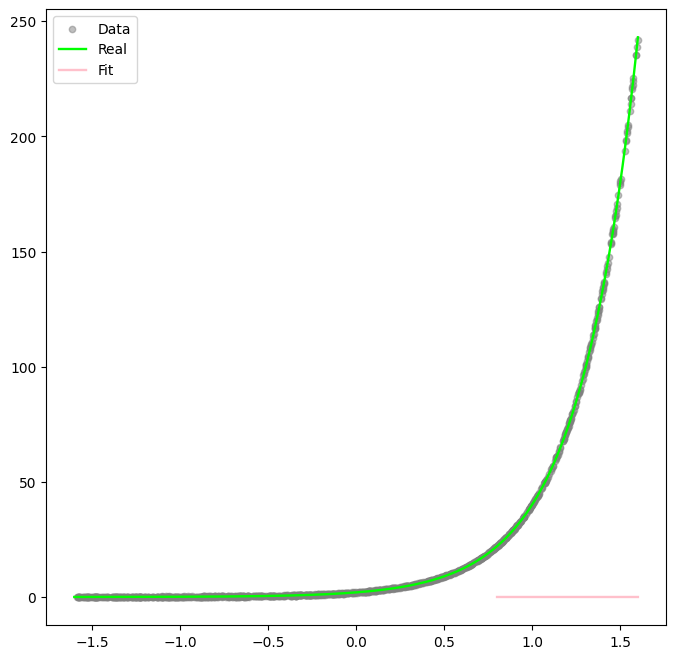

Estimated parameters: [-6.87707527e+05  7.28816669e+01]
Loss value: [2.87532908e+112]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from dataset_generator import Generator


def gauss_newton(x, y, f, jacobian, initial_guess, max_iter=100, tol=1e-5):
    p = initial_guess
    for _ in range(max_iter):
        residuals = y - f(x, p)
        jacobian_matrix = jacobian(x, p)
        step, _, _, _ = np.linalg.lstsq(jacobian_matrix.T @ jacobian_matrix, jacobian_matrix.T @ residuals, rcond=None)
        p_new = p + step
        if np.abs(p_new - p).max() < tol:
            break
        p = p_new
    return p

# Define the function and its Jacobian.
def f(x, w):
    a, b = w
    return a * np.exp(-b * x)

def jacobian(x, p):
    a, b = p
    return np.array([-np.exp(-b * x), a * x * np.exp(-b * x)]).T

def loss(Dataset_X, Dataset_Y, w):
    sum = 0

    for x, y in zip(Dataset_X, Dataset_Y):
        sum += (f(x, w) - y) ** 2

    return sum

# Generate synthetic data.
# PARAMETERS
density = 8000
dots_count = 1000
variance = 0.15
dist = 1.6
weights = (2, -3)
# ===========

gen = Generator(f)
X, Y, Dataset_X, Dataset_Y = gen.generate(dots_count, dist, density, variance, weights)

# Apply Gauss-Newton method.
initial_guess = np.array([1.0, 1.0])
p_est = gauss_newton(X, Y, f, jacobian, initial_guess)


# Plot the result.

# Plot style:
plt.style.use('default')
_ = plt.figure(figsize=(8, 8))
# ===========

plt.scatter(Dataset_X, Dataset_Y, label='Data', color='gray', alpha=0.5, s=20.8, antialiased=True)
plt.plot(X, Y, label='Real', color='lime', antialiased=True, linewidth=1.7)
plt.plot(X[6000:], f(X[6000:], p_est), label='Fit', color='pink', antialiased=True, linewidth=1.7)
plt.legend()
plt.show()

print(f"Estimated parameters: {p_est}")
print(f'Loss value: {loss(Dataset_X, Dataset_Y, p_est)}')